# Using the Virgo Filament Catalogs #

The goals of this notebook is to show:
* what is in the Virgo Filament tables
* how to read in the tables
* how to combine data from multiple tables
* how to make your own table that contains your favorite variables

# 1. Overview of Tables #

<div class="alert alert-block alert-info">
    <b>IMPORTANT</b>:  All of the v2 tables are matched by rows - each should contain 6780 rows.  Each table contains the VFID in the first column.
</div>


**TODO - Need to update the table info**

## Main Catalog ##
|Table | Brief Description |
|------|-------------------|
|vf_v2_main.fits| The main catalog.  Gives flags to indicate if galaxy is in other catalogs.|
|vf_v2_main.csv| csv version of the main catalog.  |

## Parent Catalogs ##
|Table | Brief Description |
|------|-------------------|
|vf_v2_hyperleda.fits|Hyperleda catalog |
|vf_v2_nsa_v1.fits| NSA version 1 |
|vf_v2_nsa_v0.fits| NSA version 0|
|vf_v2_a100.fits| A100 cross match |


## CO Catalogs ##
|Table | Brief Description |
|------|-------------------|
|vf_v2_co.fits | CO catalog*|
|vf_v2_paper1.fits | CO catalog, with values frozen to Paper1|


## Environment
|Table | Brief Description |
|------|-------------------|
|vf_v2_environment.fits| catalog with global env. properties |
|vf_v2_filament_distances.fits| 2D and 3D distance to each filament  |
|vf_v2_kourkchi_galaxies.fits| match to group catalog of Kourchi & Tully |
|vf_v2_kourkchi_groups_info.fits| info about individual galaxies  |
|vf_v2_matchTemple_groupinfo.fits| info about individual galaxies  |
|vf_v2_Templegroups_info.fits| info about individual galaxies  |

## Photometry
|Table | Brief Description |
|------|-------------------|
|vf_v2_legacy_ephot.fits| custom elliptical photometry from John Moustakas |
|vf_v2_r_photometry.fits| r-band photometry from Benedetta |
|vf_v2_legacy_dr9.fits| Legacy Survey Photometry from DR9 |
|vf_v2_legacy_viewer.fits| Minimum catalog for uploading to [Legacy Viewer](https://www.legacysurvey.org/viewer) |


## Halpha
|Table | Brief Description |
|------|-------------------|
|vf_v2_ha.fits| Halpha catalog (under construction) |

## Additional Ancillary Catalogs ##
|Table | Brief Description |
|------|-------------------| 
|vf_v2_agc.fits| Arecibo General Catalog of HI sources; curated by Martha Haynes|
|vf_v2_irsa_extinction.fits| Galactic extinction downloaded from IRSA Dust|
|vf_v2_nequery.fits|Input used in NED query for each galaxy|
|vf_v2_steer17.fits| Steer+17 distance catalog|
|vf_v2_unwise.fits|unWISE catalog match |
|vf_v2_z0mgs.fits| z=0 Multiwavelength Galaxy Survey (Leroy+2019) |

For a full list of the columns in each table, see our README page (coming soon!).

In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# 2: Reading and working with the tables #

* The tables are stored on google drive in the folder vf-tables:
  * https://drive.google.com/drive/folders/1UOQhd1maJeGxoWpivnhTNISwLDEMe0FY?usp=sharing
  * You should all have access to the drive folder.
* We are using v2.
  * Then select the folder with the most recent date.
* Save the tables to your local computer.

<div class="alert alert-block alert-info"><b>IMPORTANT</b> 
<ul><li> change tabledir below to reflect the location of your tables
<li> change the plotdir to the directory where you want the plots saved
    </ul>
</div>




In [6]:
homedir = os.getenv("HOME")
tabledir = homedir+'/research/Virgo/tables-north/v2/2022-08-20/'
plotdir = homedir+'/research/Virgo/plots/'

## List the available tables ##

My list might look a little different because I have some additional files in the directory.  Not to worry!

In [7]:
os.listdir(tabledir)

['vf_v2_steer17.fits',
 'vf_v2_filament_distances.fits',
 'vf_v2_main.fits',
 'vf_v2_paper1.fits',
 'vf_v2_r_photometry.fits',
 'vf_v2_unwise.fits',
 'vf_v2_magphys_07-Jul-2022.fits',
 'vf_v2_a100.fits',
 'vf_v2_nedquery.fits',
 'vf_v2_matchTempel_groupinfo.fits',
 'vf_v2_agc.fits',
 'vf_v2_legacy_ephot.fits',
 'castignani2021_cat_table_full.20-Aug-2022.fits',
 'vf_v2_legacy_dr9.fits',
 'vf_v2_ha.fits',
 'vf_v2_environment.fits',
 'vf_v2_Tempelgroups_infos.fits',
 'vf_v2_hyperleda.fits',
 'castignani2021_env_table_full.20-Aug-2022.fits',
 'vf_v2_co.fits',
 'vf_v2_nsa_v0.fits',
 'vf_v2_legacy_viewer.fits',
 'vf_v2_extinction.fits',
 'vf_v2_main.csv',
 'vf_v2_kourkchi_galaxies.fits',
 'vf_v2_z0mgs.fits',
 'vf_v2_nsa_v1.fits']

## Reading Tables ##

* the program **readtablesv2.py** will read in all of the v2 tables in one fell swoop.

In [8]:
%run ~/github/Virgo/programs/readtablesv2.py --help

usage: readtablesv2.py [-h] [--tabledir TABLEDIR] [--tableprefix TABLEPREFIX]

Read in all virgo filament tables

optional arguments:
  -h, --help            show this help message and exit
  --tabledir TABLEDIR   directory where tables are stored
  --tableprefix TABLEPREFIX
                        prefix for tables; default is vf_v2


In [9]:
%run ~/github/Virgo/programs/readtablesv2.py --tabledir $tabledir

* All of the tables are now attached to the variable "v", which is an instance of the class vtables (which is in readtablesv2.py).

* You can use "help" to see more about the tables that are available. 

  * There is a function to read in each table, e.g. 
  ```
  read_co
  ```
  * You can see the variable name for each table in the doc string. 

In [17]:
help(v)

Help on vtables in module __main__ object:

class vtables(builtins.object)
 |  vtables(tabledir, tableprefix)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tabledir, tableprefix)
 |      class containing all tables for virgo filament project
 |  
 |  read_a100(self)
 |      read in ALFALFA 100 table; store as self.a100
 |  
 |  read_agc(self)
 |      read in AGC table; store as self.agc
 |  
 |  read_all(self)
 |  
 |  read_co(self)
 |      read in CO table; store as self.co
 |  
 |  read_env(self)
 |      read in GC's env and BV envsummary table; store as self.env
 |  
 |  read_filaments(self)
 |      read in GC's filament_membership catalog
 |  
 |  read_halpha(self)
 |      read in halpha observations table; store as self.ha
 |  
 |  read_hyperleda(self)
 |      read in Hyperleda table; store as self.hl
 |  
 |  read_legacy(self)
 |      read in rband phot
 |  
 |  read_magphys(self)
 |      read in magphys table; store as self.magphys
 |  
 |  read_main(self)
 |      read 

In [24]:
v.main

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix
,,,,arcsec,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,40233,0,0,0,NGC 4363,True,False,False,False,VFID0000,False,False,False,True,True,False,VFID0000-NGC4363
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,38578,0,0,0,NGC 4133,True,False,False,False,VFID0001,False,False,False,True,True,False,VFID0001-NGC4133
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,27845,0,0,0,NGC 2977,True,False,False,False,VFID0002,False,False,False,True,True,False,VFID0002-NGC2977
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,40048,0,0,0,CGCG 352-030,True,False,False,False,VFID0003,False,False,False,True,True,False,VFID0003-CGCG352-030
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,38805,0,0,0,UGC 07189,True,False,False,False,VFID0004,False,False,False,True,True,False,VFID0004-UGC07189
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,35608,0,0,0,NGC 3752,True,False,False,False,VFID0005,False,False,False,True,True,True,VFID0005-NGC3752
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,22815,0,0,0,UGC 04202,True,False,False,False,VFID0006,False,False,False,True,True,False,VFID0006-UGC04202
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,22064,0,0,0,KUG 0746+747,True,False,False,False,VFID0007,False,False,False,True,True,False,VFID0007-KUG0746+747


## Listing columns in a table##

* if you want to get a list of the variables that are in a specific table.



In [19]:
v.main.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'radius_flag',
 'objname',
 'PGC',
 'NSAIDV1',
 'NSAIDV0',
 'AGC',
 'NEDname',
 'HLflag',
 'NSAV1flag',
 'NSAV0flag',
 'A100flag',
 'VFID_V1',
 'COflag',
 'HAflag',
 'HAobsflag',
 'Z0MGSflag',
 'Steerflag',
 'unwiseflag',
 'prefix']

## Sample Statistics ##

We can use the flags in the main table to calculate the fraction of the sample in each category.

For example, we can calculate the fraction of the sample that has Hyperleda data

In [21]:
print('total number of galaxies in the catalog = ',len(v.main))
print('number with HL data = ',sum(v.main['HLflag']))
print('fraction with HL data = %.3f '%(sum(v.main['HLflag'])/len(v.main)))

total number of galaxies in the catalog =  6780
number with HL data =  6622
fraction with HL data = 0.977 


In [29]:
# or the fraction with NSA data
flag = v.main['NSAV1flag'] | v.main['NSAV0flag']
print('fraction with NSA (v0 or v1) data = %.3f'%(sum(flag)/len(flag)))

fraction with NSA (v0 or v1) data = 0.797


In [22]:
flag = v.main['Z0MGSflag'] 
print('fraction of sample with match to z0MGS = %.3f'%(sum(flag)/len(flag)))

fraction of sample with match to z0MGS = 0.350


In [24]:
flag = v.main['unwiseflag'] 
print('fraction of sample with unwise match = %.3f'%(sum(flag)/len(flag)))

fraction of sample with unwise match = 0.902


## Plotting Sky Positions ##


<div class="alert alert-block alert-info">
    <b>IMPORTANT</b>:  Our official position for each galaxy is stored in the main table in the 'RA' and 'DEC' columns.  
</div>

* The RA and DEC are contained in the main table.  
* We can plot the positions of the galaxies are follows.

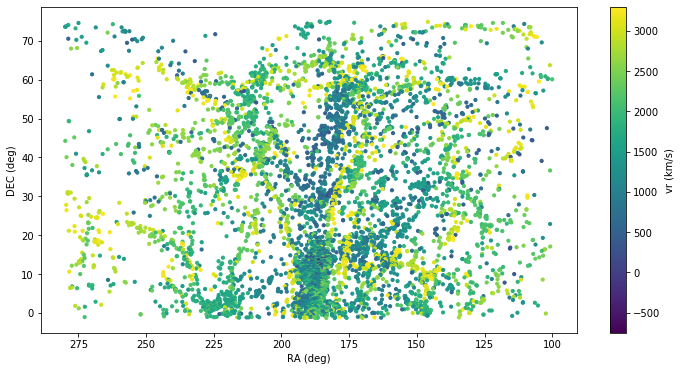

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(v.main['RA'],v.main['DEC'],c=v.main['vr'],s=10)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
cb = plt.colorbar()
cb.set_label('vr (km/s)')
ax = plt.gca()
ax.invert_xaxis()

## Selecting Subsets of Our Sample

<div class="alert alert-block alert-info">
    <b>IMPORTANT</b>:  The flags in the main table provide a convenient way to select subsamples.  
</div>

### Positions of Subsamples ##

* In the figure below, we mark the positions of the CO and Halpha sources using flags from the main table.  



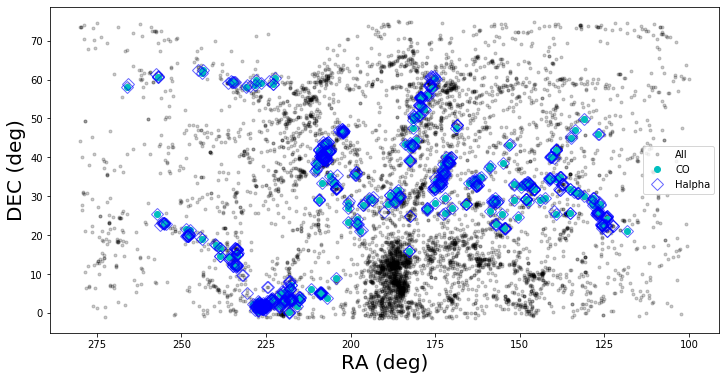

In [9]:
plt.figure(figsize=(12,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2,label='All')
# plot CO sources
flag =  v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=6,alpha=1,label='CO' )
# Galaxies observed with Halpha
flag =  v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bD',markersize=9,mfc='None',alpha=.6,label='Halpha')
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig(plotdir+'CO-sources.png')

<div class="alert alert-block alert-success">
    You should notice that all the CO sources have been observed with Halpha! 
</div>

# 3. Combining data from different tables # 

* As mentioned at the beginning, all of the tables are matched by rows. 
* This means we can easily use columns in multiple tables.


<div class="alert alert-block alert-info">
    <b>IMPORTANT</b>:  The flags in the environment table can be used to select members of filaments/cluster/field, as well as members of a particular filament, as shown below.  
</div>

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 <a list of 10 Text yticklabel objects>)

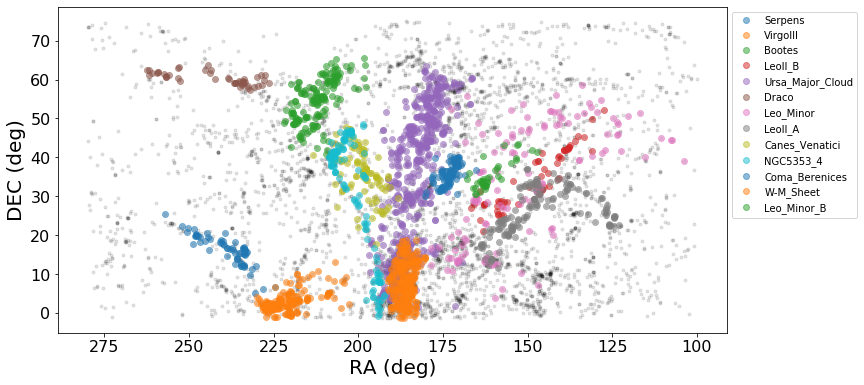

In [32]:
plt.figure(figsize=(12,6))
# get the list of unique filament names
filaments = set(v.env['filament'])
# plot positions on sky
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1)
mycolor_i=0

# loop through the list of filament
for i,f in enumerate(filaments):
    # select only galaxies that are filament members and in the filament "f"
    filamentflag = v.env['filament_member'] & (v.env['filament'] == f)
    if i == len(mycolors):
        mycolor_i = i - len(mycolors)
    # plot the positions of the galaxies in the current filament
    plt.plot(v.main['RA'][filamentflag],v.main['DEC'][filamentflag],'ko',c=mycolors[mycolor_i],alpha=.5,label=f)
    # increment the color index
    mycolor_i += 1
# adjust plot so N is up and E to the left
plt.gca().invert_xaxis()
# add a legend outside the plot
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# label axes and adjust fontsize of ticks
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### Another example: SFR vs Stellar mass

* Until we get stellar masses and SFR from magphys, we have info for a subset of our sample that is in the Z0MGS.  
* We can list the columns in that table with:

In [7]:
v.z0mgs.colnames

['VFID',
 'cntr',
 'dist_x',
 'pang_x',
 'galid',
 'major',
 'pgc_name',
 'pgc',
 'ra_z0mgs',
 'dec_z0mgs',
 'gl_deg',
 'gb_deg',
 'resolution',
 'has_fuv',
 'has_nuv',
 'has_wise1',
 'has_wise2',
 'has_wise3',
 'has_wise4',
 'time_fuv',
 'time_nuv',
 'afuv',
 'anuv',
 'rms_fuv',
 'std_fuv',
 'rms_nuv',
 'std_nuv',
 'rms_wise1',
 'std_wise1',
 'rms_wise2',
 'std_wise2',
 'rms_wise3',
 'std_wise3',
 'rms_wise4',
 'std_wise4',
 'sat_effects_fuv',
 'star_area_fuv',
 'star_flux_fuv',
 'star_flag_fuv',
 'sat_effects_nuv',
 'star_area_nuv',
 'star_flux_nuv',
 'star_flag_nuv',
 'sat_effects_wise1',
 'star_area_wise1',
 'star_flux_wise1',
 'star_flag_wise1',
 'sat_effects_wise2',
 'star_area_wise2',
 'star_flux_wise2',
 'star_flag_wise2',
 'sat_effects_wise3',
 'star_area_wise3',
 'star_flux_wise3',
 'star_flag_wise3',
 'sat_effects_wise4',
 'star_area_wise4',
 'star_flux_wise4',
 'star_flag_wise4',
 'galaxy_mask_overlap',
 'galaxy_overlap_flag',
 'flux_fuv',
 'rms_flux_fuv',
 'std_flux_fuv',


Text(0.5, 1.0, 'Comparison of CO Sample to All Galaxies')

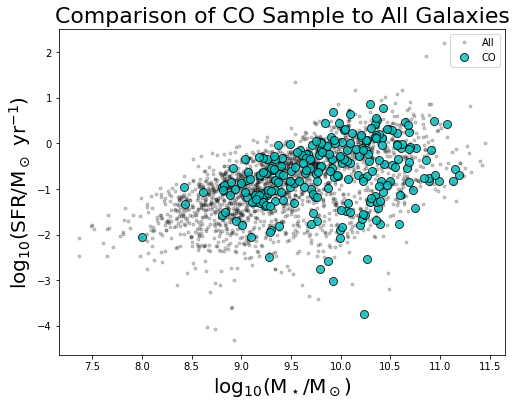

In [37]:
plt.figure(figsize=(8,6))
# make a flag for those with an available stellar mass
flag = v.main['Z0MGSflag']

# plot SFR vs stellar mass
plt.plot(v.z0mgs['logmass'][flag],v.z0mgs['logsfr'][flag],'k.',alpha=.2,label='All')

# now let's plot the CO sources as well
flagCO = (v.z0mgs['logmass'] > 0) & v.main['COflag']
plt.plot(v.z0mgs['logmass'][flagCO],v.z0mgs['logsfr'][flagCO],'co',markersize=8,mec='k',alpha=.8,label='CO')

plt.legend()

plt.xlabel(r'$\rm \log_{10}(M_\star/M_\odot)$',fontsize=20)
plt.ylabel(r'$\rm \log_{10}(SFR/M_\odot~yr^{-1})$',fontsize=20)
plt.title('Comparison of CO Sample to All Galaxies',fontsize=22)

### Compare CO sources to all filament galaxies

We can modify the above code to show the SFR-Mstar properties of the CO sources compared to all of the filament galaxies.

Text(0.5, 1.0, 'Filament Members Only')

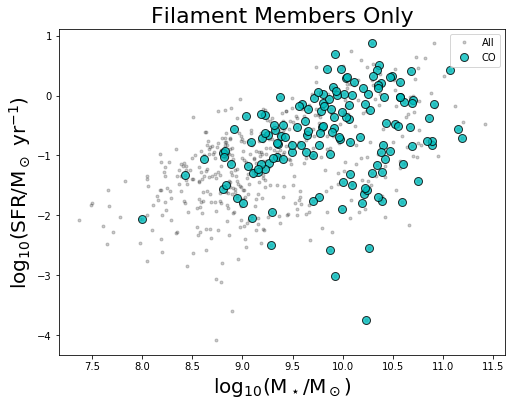

In [52]:
plt.figure(figsize=(8,6))
# make a flag for those with an available stellar mass, and filament member
flag = v.main['Z0MGSflag'] & v.env['filament_member']

# plot SFR vs stellar mass 
plt.plot(v.z0mgs['logmass'][flag],v.z0mgs['logsfr'][flag],'k.',alpha=.2,label='All')

# now let's plot the CO sources as well, and require them to be filament members
flagCO = v.main['Z0MGSflag'] & v.main['COflag'] & v.env['filament_member']
plt.plot(v.z0mgs['logmass'][flagCO],v.z0mgs['logsfr'][flagCO],'co',markersize=8,mec='k',alpha=.8,label='CO')


plt.legend()

plt.xlabel(r'$\rm \log_{10}(M_\star/M_\odot)$',fontsize=20)
plt.ylabel(r'$\rm \log_{10}(SFR/M_\odot~yr^{-1})$',fontsize=20)
plt.title('Filament Members Only',fontsize=22)

<div class="alert alert-block alert-success">
    Looks like we need to submit another CO proposal to finish the filament galaxies! 
</div>

# 4. Write a new table #

<div class="alert alert-block alert-info">
    <b>IMPORTANT</b>:  You can create your own custom table by combining columns from various tables.  
</div>

The code below demonstrates how to:

* combine columns from multiple tables into a new table, and
* save the table as a fits file. 

As an example, I am creating a table with the VFID, RA, and Dec from the main table with the stellar mass and SFR from the z0MGS survey, as well as a flag to indicate of the galaxy is in the z0MGS sample.

In [30]:
newtab = Table([v.main['VFID'],v.main['RA'],v.main['DEC'],v.main['Z0MGSflag'],v.z0mgs['logmass'],v.z0mgs['logsfr']])

In [31]:
newtab

VFID,RA,DEC,Z0MGSflag,logmass,logsfr
,,,,log(solMass),log(solMass/yr)
bytes8,float64,float64,bool,float64,float64
VFID0000,185.86877249999998,74.9522485,True,8.87,-1.42
VFID0001,182.208,74.9042778,True,9.79,0.13
VFID0002,145.944663,74.8595778,True,10.35,0.34
VFID0003,185.5730835,74.8383889,True,9.58,-2.35
VFID0004,182.82775049999998,74.8082222,True,9.54,-1.14
VFID0005,173.1341835,74.6275401,True,9.76,-0.55
VFID0006,121.912404,74.5846308,True,8.98,-1.69
VFID0007,118.2363,74.576533,True,8.91,-1.65


In [32]:
# this will write the file out to the plot directory, but you can easily choose another path.
newtab.write(plotdir+'test_table.fits',format='fits',overwrite=True)

### Another example of writing a new table: filament members without CO

As another example, I can write out a subset of the main table for filament galaxies with stellar masses above $log(M/M_\odot) > 9$ that have not yet been observed in CO.

Again, because we don't have stellar masses for the full sample, we will limit this to galaxies that are in the Z0MGS.


In [72]:
# CO flag is false, z0MGS is true, and stellar mass > 9
noCOflag = ~v.main['COflag'] & v.main['Z0MGSflag'] & v.env['filament_member'] 
noCOmassflag  = noCOflag &  (v.z0mgs['logmass'] > 9.)
print('the number of CO sources that still need CO observations = {}'.format(np.sum(noCOmassflag)))

the number of CO sources that still need CO observations = 284


Text(0.5, 1.0, 'Filament Members with No CO')

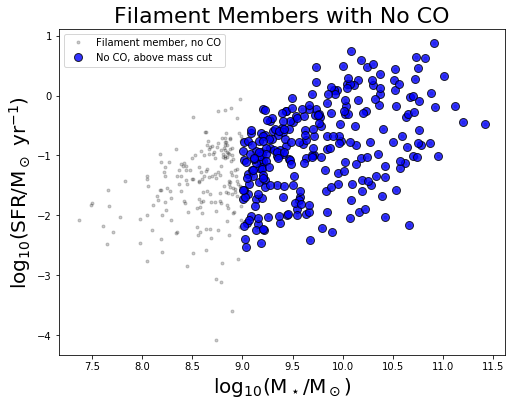

In [71]:
plt.figure(figsize=(8,6))
# make a flag for those with an available stellar mass

# plot SFR vs stellar mass
plt.plot(v.z0mgs['logmass'][noCOflag],v.z0mgs['logsfr'][noCOflag],'k.',alpha=.2,label='Filament member, no CO')

# now let's plot the CO sources as well, and require them to be filament members
plt.plot(v.z0mgs['logmass'][noCOmassflag],v.z0mgs['logsfr'][noCOmassflag],'bo',markersize=8,mec='k',alpha=.8,label='No CO, above mass cut')


plt.legend()

plt.xlabel(r'$\rm \log_{10}(M_\star/M_\odot)$',fontsize=20)
plt.ylabel(r'$\rm \log_{10}(SFR/M_\odot~yr^{-1})$',fontsize=20)
plt.title('Filament Members with No CO',fontsize=22)

Now that we have the sample defined, I will write out a table for the filament members that still need CO observations.

I am going to keep all the columns in the main table, and then add information about 
* the filament that each galaxy is in
* stellar mass from z0mgs table
* SFR from z0mgs table

In [78]:
# make a subset of the main table

newtab = v.main[noCOmassflag]

# add column for filament

newtab.add_column(v.env['filament'][noCOmassflag])

# add SFR and stellar mass from z0MGS

newtab.add_column(v.z0mgs['logmass'][noCOmassflag])
newtab.add_column(v.z0mgs['logsfr'][noCOmassflag])
newtab.write(plotdir+"/filament_member_noCO.fits",format='fits',overwrite=True)
newtab.write(plotdir+"/filament_member_noCO.csv",format='csv',overwrite=True)

In [75]:
# check that the table contains what we think it should
newtab

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,filament,logmass,logsfr
,,,,arcsec,,,,,,,,,,,,,,,,,,,,,log(solMass),log(solMass/yr)
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36,bytes40,float64,float64
VFID0309,244.315089,63.8531508,3109.2,35.73726,True,UGC10334,57722,0,0,0,UGC 10334,True,False,False,False,VFID0309,False,False,False,True,True,False,VFID0309-UGC10334,Draco,9.27,-0.43
VFID0358,253.015095,63.1157615,3109.6,22.704987,True,IC1235,59146,687181,167116,0,IC 1235,True,True,True,False,VFID0358,False,False,False,True,True,True,VFID0358-IC1235,Draco,9.2,-0.23
VFID0378,202.5150195,62.5115364,1760.3,47.546795,True,NGC5205,47425,136858,27983,0,NGC 5205,True,True,True,False,VFID0378,False,False,False,True,True,True,VFID0378-NGC5205,Bootes,9.97,-0.48
VFID0402,180.55084349999998,62.13726,1209.2,77.11187,True,NGC4041,37999,134706,27641,0,NGC 4041,True,True,True,False,VFID0402,False,False,False,True,True,True,VFID0402-NGC4041,Ursa_Major_Cloud,10.24,0.47
VFID0413,259.1987715,61.9201085,3073.2,39.095005,True,UGC10796,59997,24709,4234,0,UGC 10796,True,True,True,False,VFID0413,False,False,False,True,True,True,VFID0413-UGC10796,Draco,9.5,-0.44
VFID0415,180.36171900000002,61.8957613,1370.3,145.58655,True,NGC4036,37930,664935,160904,0,NGC 4036,True,True,True,False,VFID0415,False,False,False,True,True,True,VFID0415-NGC4036,Ursa_Major_Cloud,10.78,-0.83
VFID0423,259.4708505,61.7807683,3044.3,31.92429,True,NGC6359,60025,0,0,0,NGC 6359,True,False,False,False,VFID0423,False,False,False,True,True,True,VFID0423-NGC6359,Draco,10.62,-1.12
VFID0428,208.347228,61.6717257,1857.0,35.16586,True,UGC08822,49350,137266,28082,0,UGC 08822,True,True,True,False,VFID0428,False,False,False,True,True,True,VFID0428-UGC08822,Bootes,9.06,-1.31


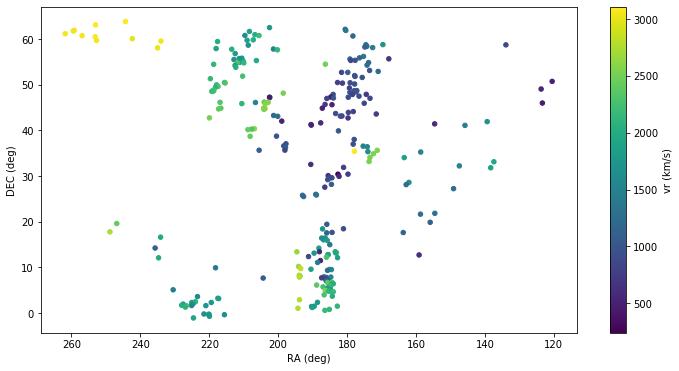

In [79]:
# plot RA and DEC of targets
plt.figure(figsize=(12,6))
plt.scatter(newtab['RA'],newtab['DEC'],c=newtab['vr'],s=20)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
cb = plt.colorbar()
cb.set_label('vr (km/s)')
ax = plt.gca()
ax.invert_xaxis()
plt.savefig(plotdir+"/filament_member_noCO.png")


# Questions, comments, suggestions, complaints?

* Email me, or better yet, submit an issue at https://github.com/rfinn/Virgo/issues .

* If you have another example that would be good to include, send it along or become a contributor.

In [42]:
z = np.array([min(v.main['vr']),max(v.main['vr'])])/3.e5
print(z)

[-0.00249833  0.010999  ]
